In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ruta = "../resultados_codex/A40-1/A40-1_0626_1000_codex.ill"

raw = []
with open(ruta, "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue  # ignora comentarios y líneas vacías
        parts = line.replace("\t", " ").split()
        if len(parts) < 7:
            continue  # ignora filas incompletas
        # x y z Nx Ny Nz E
        x, y, z, nx, ny, nz, E = map(float, parts[:7])
        raw.append((x, y, E))

if not raw:
    raise ValueError("No se detectaron datos válidos en el archivo.")

arr = np.array(raw, dtype=float)  # shape (N, 3): [x, y, E]
x = arr[:, 0]
y = arr[:, 1]
E = arr[:, 2]

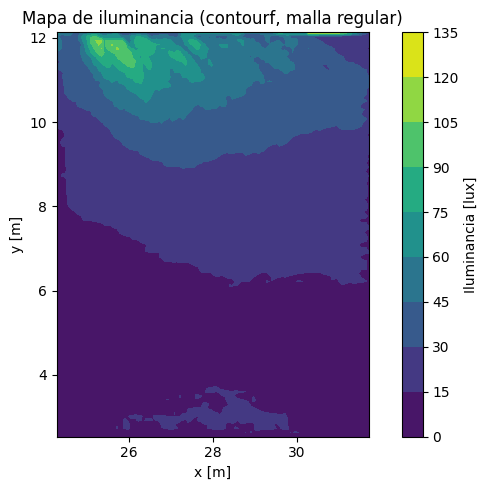

In [9]:

# ---------- 2) Intentar armar malla regular ----------
xs = np.unique(x)
ys = np.unique(y)
X, Y = np.meshgrid(xs, ys)  # ojo: Y es filas, X es columnas
Z = np.full((ys.size, xs.size), np.nan)

# Mapeo (x,y) -> índices en la grilla
xi_map = {v: i for i, v in enumerate(xs)}
yi_map = {v: i for i, v in enumerate(ys)}

for xv, yv, ev in zip(x, y, E):
    Z[yi_map[yv], xi_map[xv]] = ev

# ---------- 3) Graficar ----------
fig, ax = plt.subplots(figsize=(7, 5))

if np.isfinite(Z).sum() == Z.size:
    # Malla completa -> contourf estándar
    cs = ax.contourf(X, Y, Z, levels=10)
    titulo = "Mapa de iluminancia (contourf, malla regular)"
else:
    # Malla incompleta/no rectangular -> tricontourf
    cs = ax.tricontourf(x, y, E, levels=20)
    titulo = "Mapa de iluminancia (tricontourf, malla irregular)"

cbar = fig.colorbar(cs, ax=ax)
cbar.set_label("Iluminancia [lux]")

ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_aspect("equal", adjustable="box")
ax.set_title(titulo)
plt.tight_layout()
plt.show()